In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
colors = sns.color_palette()
from matplotlib import rcParams
params = {'axes.labelsize': 28,
          'axes.grid': True,
          'axes.linewidth': 1.6,
          'axes.titlepad': 20,
          'axes.xmargin': 0.05,
          'axes.ymargin': 0.05,
          'grid.alpha': 0.2,
          'grid.color': '#666666',
          'grid.linestyle': '-.',
          'legend.fontsize': 16,
          'legend.loc': 'lower right',
          'xtick.labelsize': 28,
          'xtick.major.width': 1.6,
          'xtick.major.size': 10,
          'xtick.minor.width': 1.0,
          'xtick.minor.size': 4,
          'ytick.labelsize': 28,
          'ytick.major.width': 1.6,
          'ytick.major.size': 10,
          'ytick.minor.width': 1.0,
          'ytick.minor.size': 4,
          'text.usetex': True,
          'figure.figsize': [8, 8],
          'font.size': 16.0, 
          'lines.markersize': np.sqrt(20) * 2.5,
          'figure.autolayout': True}
rcParams.update(params)

In [27]:
import sys
sys.path.insert(1, "D:\Github\MLTeam_FairBoundaryTree\CART")
sys.path.insert(1, "D:\Github\MLTeam_FairBoundaryTree\LeafRelabeling")
from cart_tree import DecisionTree
import algebraicTree_CART

In [31]:
from generate_synthetic_data import generate_synthetic_data
from sklearn.model_selection import train_test_split

X, y, x_control = generate_synthetic_data(plot_data=False)
x_control = x_control['s1']

n, d = np.shape(X)

unfair_X = np.zeros((n,3))
unfair_X[:,0:2] = X[:,:] ; unfair_X[:,2] = x_control[:]

indices = np.array(list(range(X.shape[0])))
np.random.shuffle(indices)
unfair_X = unfair_X[indices]
y = y[indices]

X_train, X_test, y_train, y_test = train_test_split(unfair_X, y, test_size=0.1, random_state=42)

In [32]:
print(X_train, '\n\n\n', y_train, '\n\n\n', x_control)

print('\n', X_train.shape)

[[-2.75672847 -4.45643619  0.        ]
 [ 0.97599362  0.45780221  0.        ]
 [ 2.87513662 -1.73334867  1.        ]
 ...
 [-1.74685579 -2.01879578  0.        ]
 [ 6.12100669  2.15713853  0.        ]
 [ 2.48973738 -0.5385115   0.        ]] 


 [-1.  1. -1. ... -1.  1.  1.] 


 [0. 1. 0. ... 0. 0. 1.]

 (1800, 3)


In [33]:
tree = DecisionTree(min_samples=1, impurity_type='entropy', _lambda=2, max_leaves=10)
tree.fit(X_train, y_train)

In [34]:
tree_graph = tree.builTree()
tree_graph.render("tree")

'tree.png'

In [35]:
for item in tree.nodes:
    print(tree.nodes[item].y_unique)
    print(tree.nodes[item].stats)

[-1.  1.]
[913 887]
[-1.  1.]
[826 166]
[-1.  1.]
[ 87 721]
[-1.  1.]
[53 44]
[-1.  1.]
[ 34 677]
[-1.  1.]
[53 19]
[1.]
[25]
[-1.  1.]
[33  2]
[-1.  1.]
[20 17]
[-1.]
[30]
[-1.  1.]
[3 2]
[-1.]
[2]
[-1.  1.]
[1 2]
[1.]
[2]
[-1.]
[1]
[-1.  1.]
[521  20]
[-1.  1.]
[305 146]
[-1.  1.]
[161  20]
[-1.  1.]
[144 126]


In [36]:
from sklearn.metrics import accuracy_score

print(accuracy_score(tree.predict(X_train), y_train))

KeyError: 32

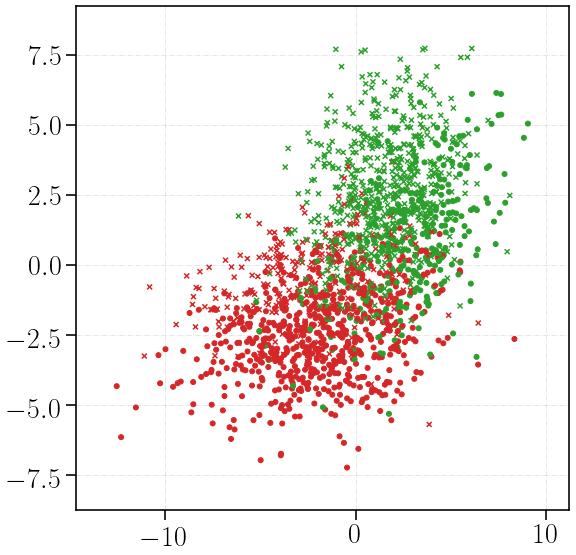

In [11]:
marker_styles = np.array(['o','x'])
colors = np.asarray(sns.color_palette())

X_color = np.zeros(X_train.shape[0])
X_color[np.where(y_train == 1)[0]] = 2
X_color[np.where(y_train == -1)[0]] = 3

X_marker = np.zeros(X_train.shape[0])
X_marker[np.where(X_train[:,2] == 0)[0]] = 0
X_marker[np.where(X_train[:,2] == 1)[0]] = 1

x_lim = [np.min(X_train[:,0]), np.max(X_train[:,0])]
y_lim = [np.min(X_train[:,1]), np.max(X_train[:,1])]
x_range = x_lim[1] - x_lim[0] ; y_range = y_lim[1] - y_lim[0]

plt.scatter(X_train[X_marker == 0,0], X_train[X_marker == 0,1], c=colors[X_color[X_marker == 0].astype(int)], marker='o', s=25)
plt.scatter(X_train[X_marker == 1,0], X_train[X_marker == 1,1], c=colors[X_color[X_marker == 1].astype(int)], marker='x', s=25)

plt.xlim([x_lim[0] - x_range*0.1, x_lim[1] + x_range*0.1]);
plt.ylim([y_lim[0] - y_range*0.1, y_lim[1] + y_range*0.1]);

# Tests on Iris

In [4]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import sys
sys.path.insert(1, "D:\Github\MLTeam_FairBoundaryTree\CART")
sys.path.insert(1, "D:\Github\MLTeam_FairBoundaryTree\LeafRelabeling")
from cart_tree import DecisionTree
import algebraicTree_CART

In [15]:
X = load_iris().data
y = load_iris().target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

tree = DecisionTree(min_samples=1, impurity_type='entropy', _lambda=2, max_leaves=5)
tree.fit(X_train, y_train)

In [16]:
print(accuracy_score(tree.predict(X_test), y_test))

KeyError: 7

In [8]:
tree_graph = tree.builTree()
tree_graph.render("tree")

'tree.png'